# EDA

In [28]:
import pandas as pd
import numpy as np

In [29]:
basketball = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/basketball_stat.csv")
basketball.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [30]:
# 필요없는 열 삭제
basketball.drop("Player", axis = 1, inplace = True)

In [31]:
# 기본 정보 출력
basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     100 non-null    object 
 1   3P      100 non-null    float64
 2   2P      100 non-null    float64
 3   TRB     100 non-null    float64
 4   AST     100 non-null    float64
 5   STL     100 non-null    float64
 6   BLK     100 non-null    float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [32]:
# 최대, 최소, 평균, 표준편자, 중앙값 등 출력
basketball.describe()

,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


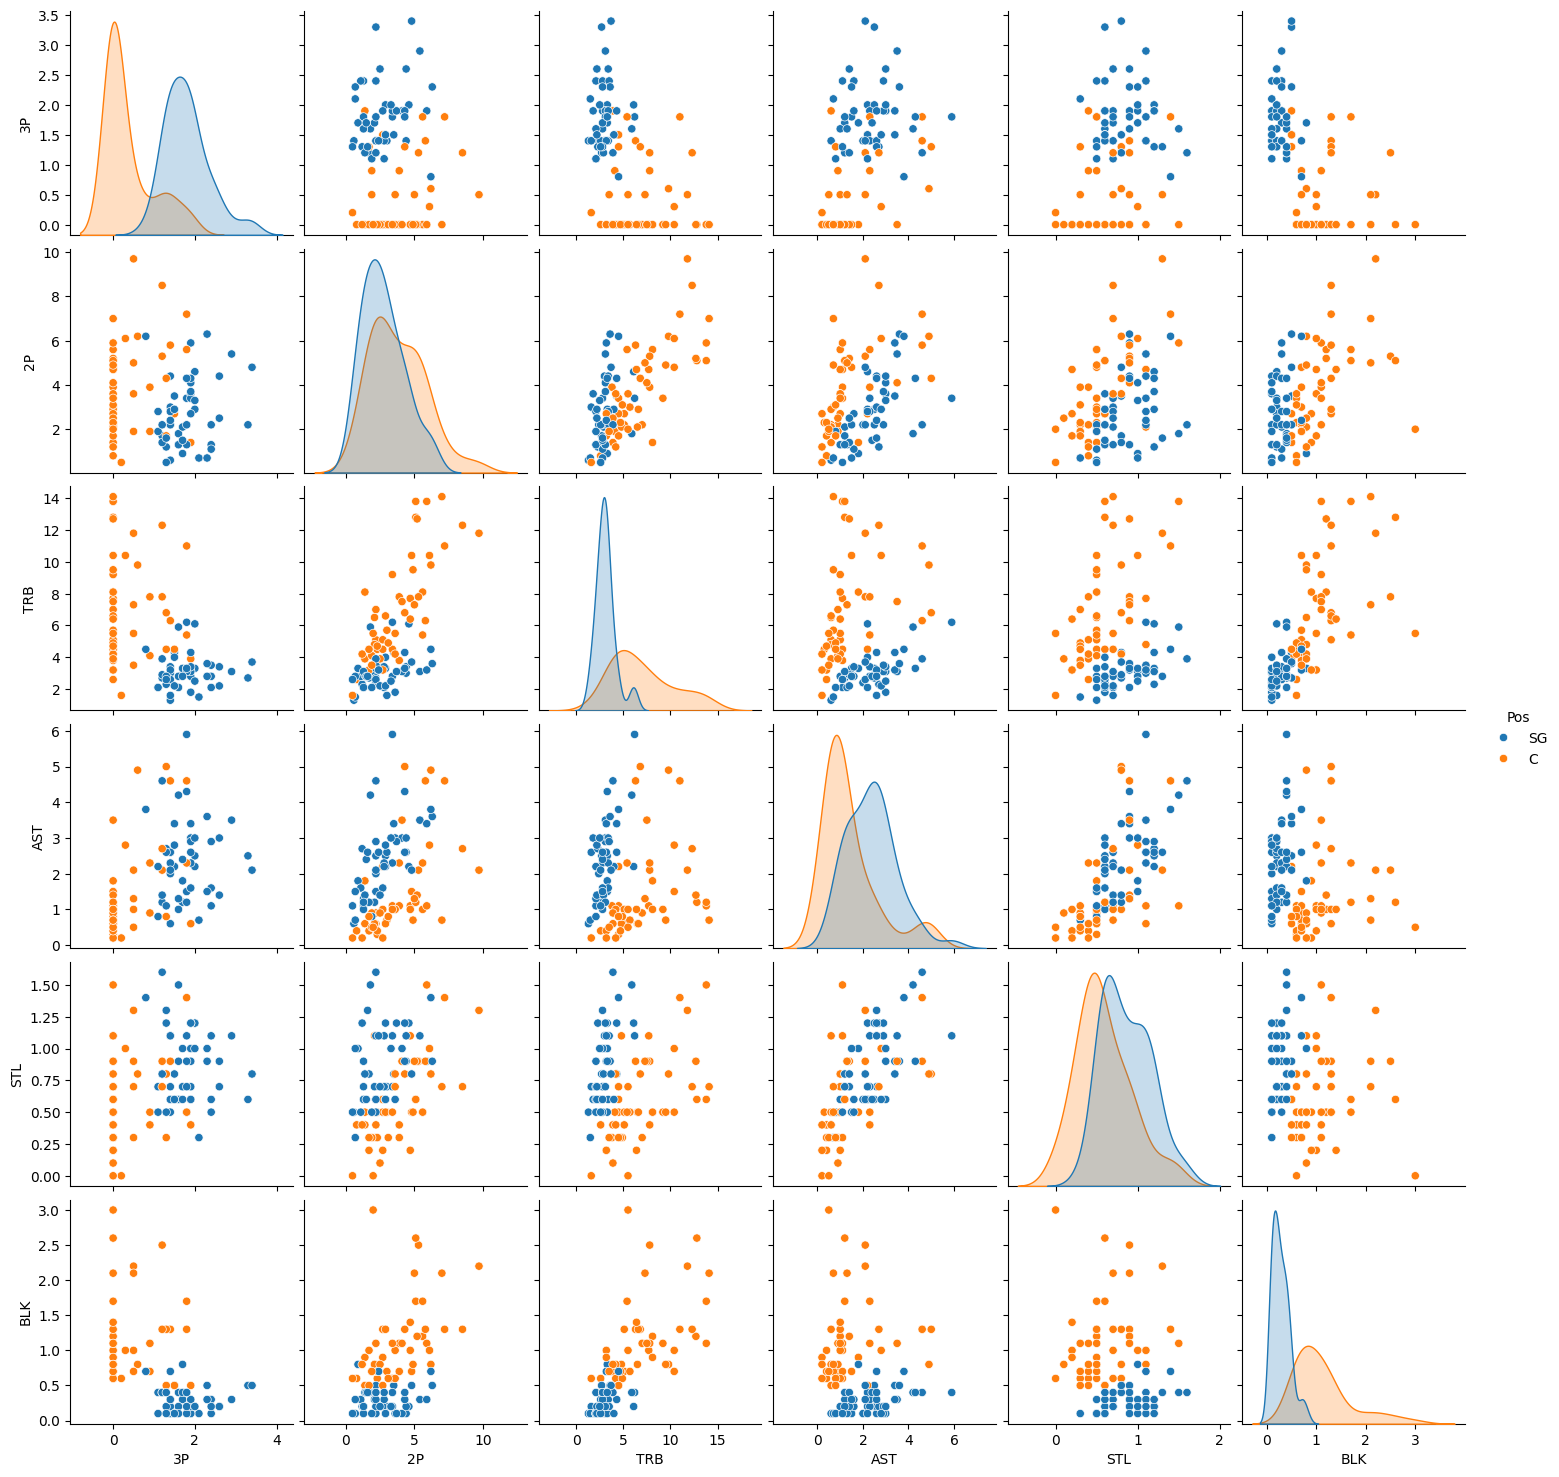

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클래스별 pairplot 그리기
sns.pairplot(basketball, hue="Pos")

<Axes: >

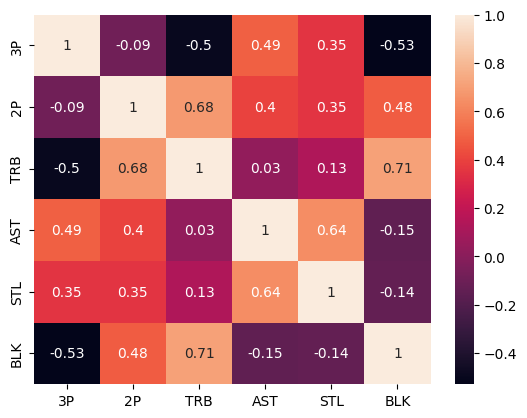

In [34]:
# 상관관계 분석
sns.heatmap(basketball.drop("Pos", axis = 1).corr().round(2), annot=True)

In [35]:
# 독립변수 / 종속변수 구분 - 종속변수는 output
X = basketball.drop("Pos", axis=1)
y = basketball["Pos"]

In [36]:
# 훈련 데이터, 테스트 데이터 나누기 - 각 클래스(타겟)값이 비슷한 비율로 분류되도록 하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [37]:
# 정규화 스케일링
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [38]:
# 표준화 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

# 머신러닝

## 1. knn

In [39]:
# knn 모델 생성, 학습, train score/test score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [40]:
print(f"knn train {knn.score(X_train_scaled, y_train)}")
print(f"knn test {knn.score(X_test_scaled, y_test)}")

knn train 0.9857142857142858
knn test 0.9666666666666667


In [41]:
# 이웃의 수(n_neighbors)를 3으로 지정해서 다시 학습, score 계산
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

print(f"knn train {knn.score(X_train_scaled, y_train)}")
print(f"knn test {knn.score(X_test_scaled, y_test)}")

knn train 0.9857142857142858
knn test 0.9666666666666667


In [42]:
# 그리드 서치(StratifiedKFold 사용)후 최적의 하이퍼파라미터 출력
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

params = {
    "n_neighbors": range(3, 33)
}
gs = GridSearchCV(KNeighborsClassifier(), params, cv = StratifiedKFold())

gs.fit(X_train_scaled, y_train)
print(f"best k params = {gs.best_params_}")

best k params = {'n_neighbors': 3}


In [43]:
# 최고의 교차검증 점수 출력
gs.best_score_

0.9857142857142858

In [44]:
# 최적의 모델로 정확도 다시 계산knn = KNeighborsClassifier(n_neighbors=3)
knn = gs.best_estimator_

print(f"knn train {knn.score(X_train_scaled, y_train)}")
print(f"knn test {knn.score(X_test_scaled, y_test)}")

knn train 0.9857142857142858
knn test 0.9666666666666667


## 2. lr

In [45]:
# lr 모델 생성, 학습, train score/test score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [46]:
print(f"lr train {lr.score(X_train_scaled, y_train)}")
print(f"lr test {lr.score(X_test_scaled, y_test)}")

lr train 0.9857142857142858
lr test 0.9666666666666667


In [47]:
# 이웃의 수(C)를 0.1으로 지정해서 다시 학습, score 계산
lr = LogisticRegression(C = 0.1)
lr.fit(X_train_scaled, y_train)

print(f"lr train {lr.score(X_train_scaled, y_train)}")
print(f"lr test {lr.score(X_test_scaled, y_test)}")

lr train 0.9857142857142858
lr test 0.9666666666666667


In [48]:
# 그리드 서치(StratifiedKFold 사용)후 최적의 하이퍼파라미터 출력

params = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
gs = GridSearchCV(LogisticRegression(), params, cv = StratifiedKFold())

gs.fit(X_train_scaled, y_train)
print(f"best C params = {gs.best_params_}")

best C params = {'C': 0.0001}


In [49]:
# 최고의 교차검증 점수 출력
gs.best_score_

0.9857142857142858

In [50]:
# 최적의 모델로 정확도 다시 계산 lr = LogisticRegression(C = 0.1)
lr = gs.best_estimator_

print(f"lr train {lr.score(X_train_scaled, y_train)}")
print(f"lr test {lr.score(X_test_scaled, y_test)}")

lr train 0.9714285714285714
lr test 0.9666666666666667


In [51]:
# 기울기, 절편 출력

print(lr.classes_)
print(lr.coef_.shape, lr.intercept_.shape)

print(lr.coef_, lr.intercept_)

['C' 'SG']
(1, 6) (1,)
[[ 0.00284477 -0.00124772 -0.00220252  0.00128974  0.00146082 -0.00246988]] [-4.34352659e-11]


## 3. dt

In [52]:
# dt 모델 생성, 학습, train score/test score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
print(f"dt train {dt.score(X_train, y_train)}")
print(f"dt test {dt.score(X_test, y_test)}")

dt train 1.0
dt test 0.8666666666666667


In [54]:
# dt 깊이 출력
print(f"dt 깊이 = {dt.get_depth()}")

dt 깊이 = 3


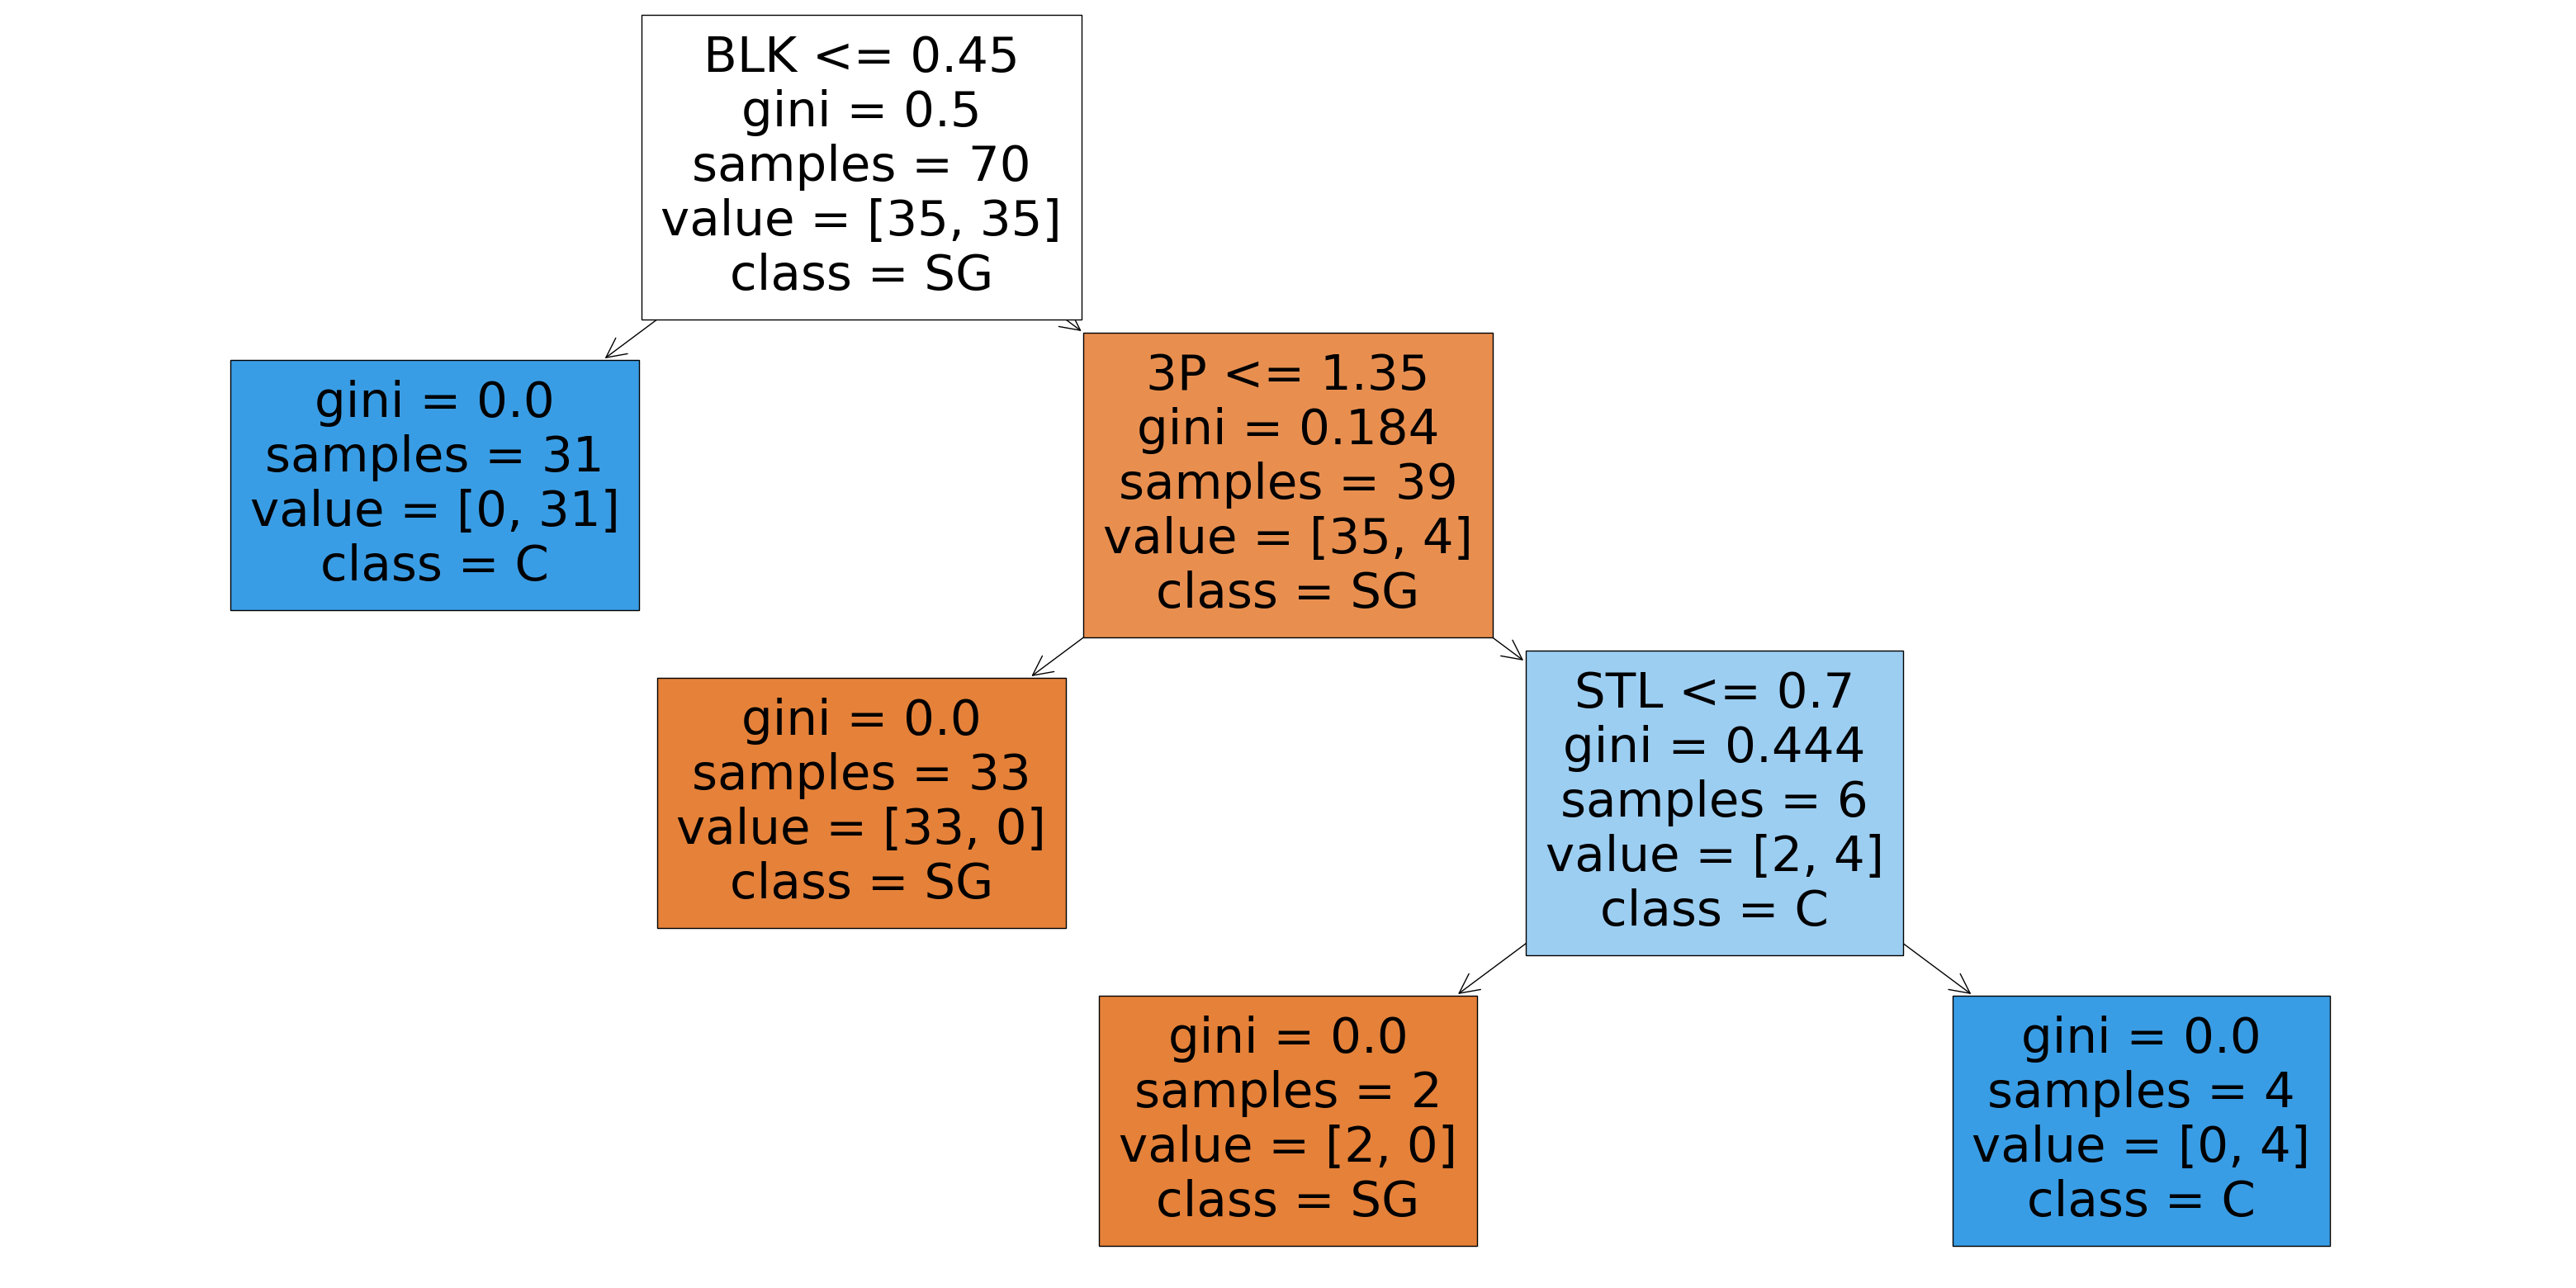

In [55]:
# 트리 시각화
from sklearn.tree import plot_tree

class_names = [str(cls) for cls in pd.unique(y)]

plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [56]:
# 깊이 3으로 제한 후 다시 학습
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

print(f"dt train = {dt.score(X_train, y_train)}")
print(f"dt test = {dt.score(X_test, y_test)}")

dt train = 1.0
dt test = 0.9


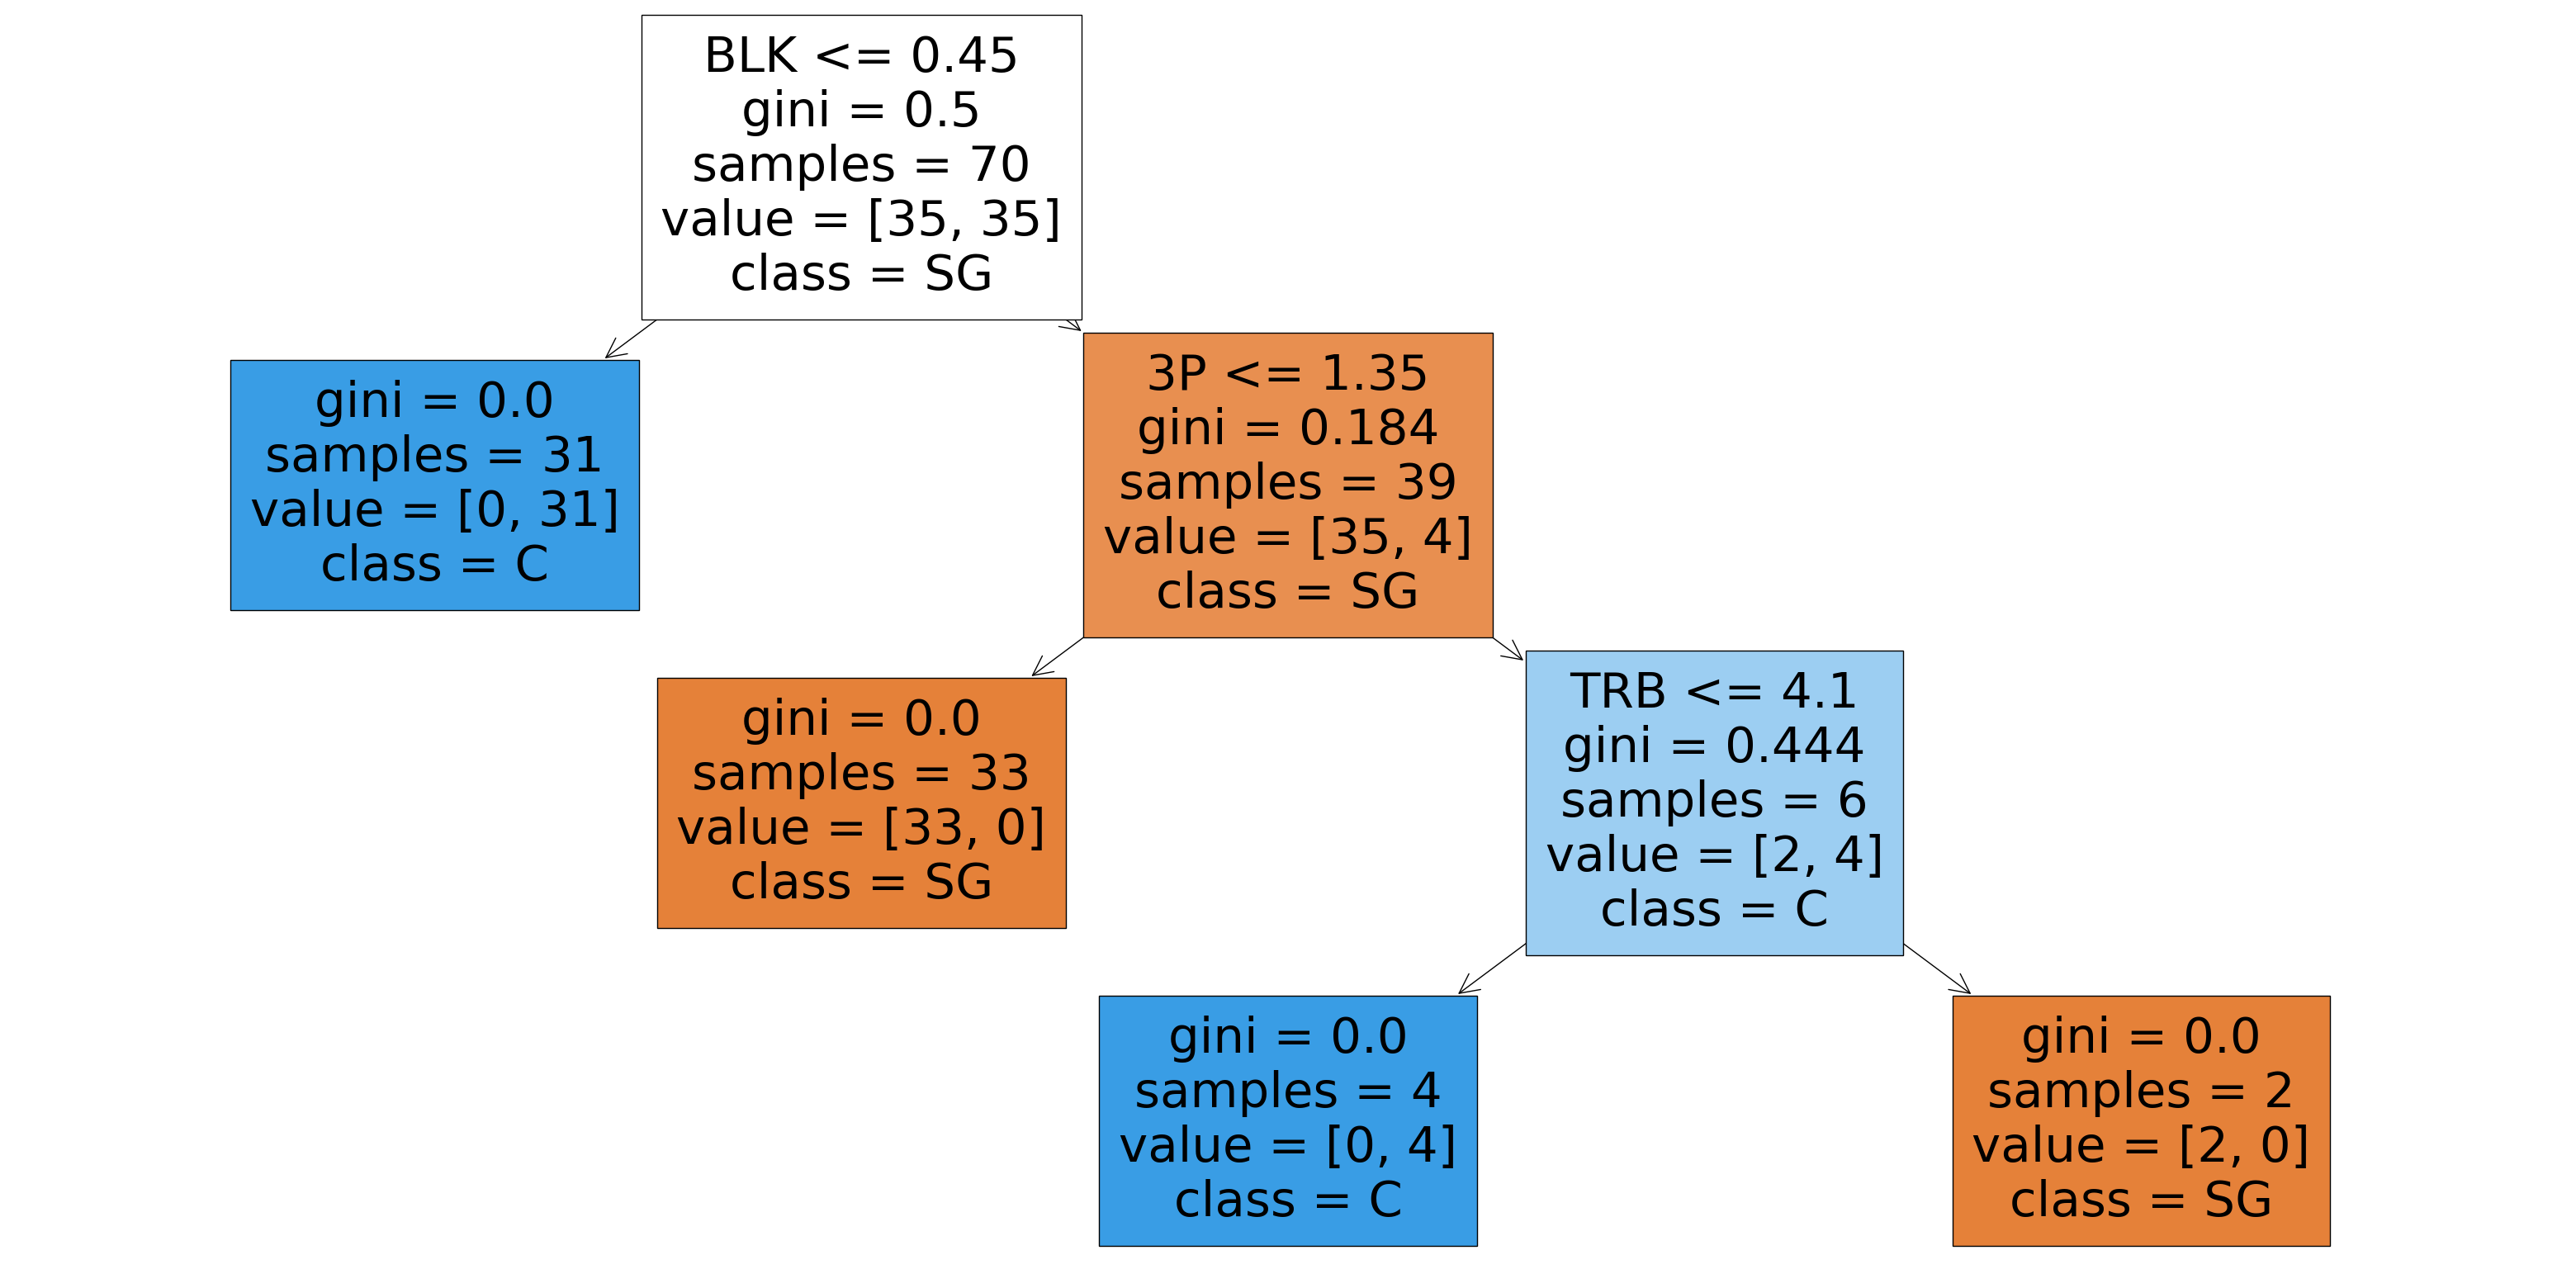

In [57]:
# 깊이 제한 후 시각화
from sklearn.tree import plot_tree

class_names = [str(cls) for cls in pd.unique(y)]

plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

In [58]:
# 그리드 서치(StratifiedKFold 사용)후 최적의 하이퍼파라미터 출력

params = {
    'max_depth' : range(1,10,1),
    'min_samples_split' : range(2,30,5),
    'min_samples_leaf' : range(2,30,5)
}

gs = GridSearchCV(DecisionTreeClassifier(), params, cv = StratifiedKFold())

gs.fit(X_train, y_train)
print(f"best params = {gs.best_params_}")

best params = {'max_depth': 1, 'min_samples_leaf': 27, 'min_samples_split': 2}


In [59]:
# 최고의 교차검증 점수 출력
gs.best_score_

0.9428571428571428

In [60]:
# 최적의 모델로 정확도 다시 계산
dt = gs.best_estimator_

print(f"dt train = {dt.score(X_train, y_train)}")
print(f"dt test = {dt.score(X_test, y_test)}")

dt train = 0.9428571428571428
dt test = 0.9


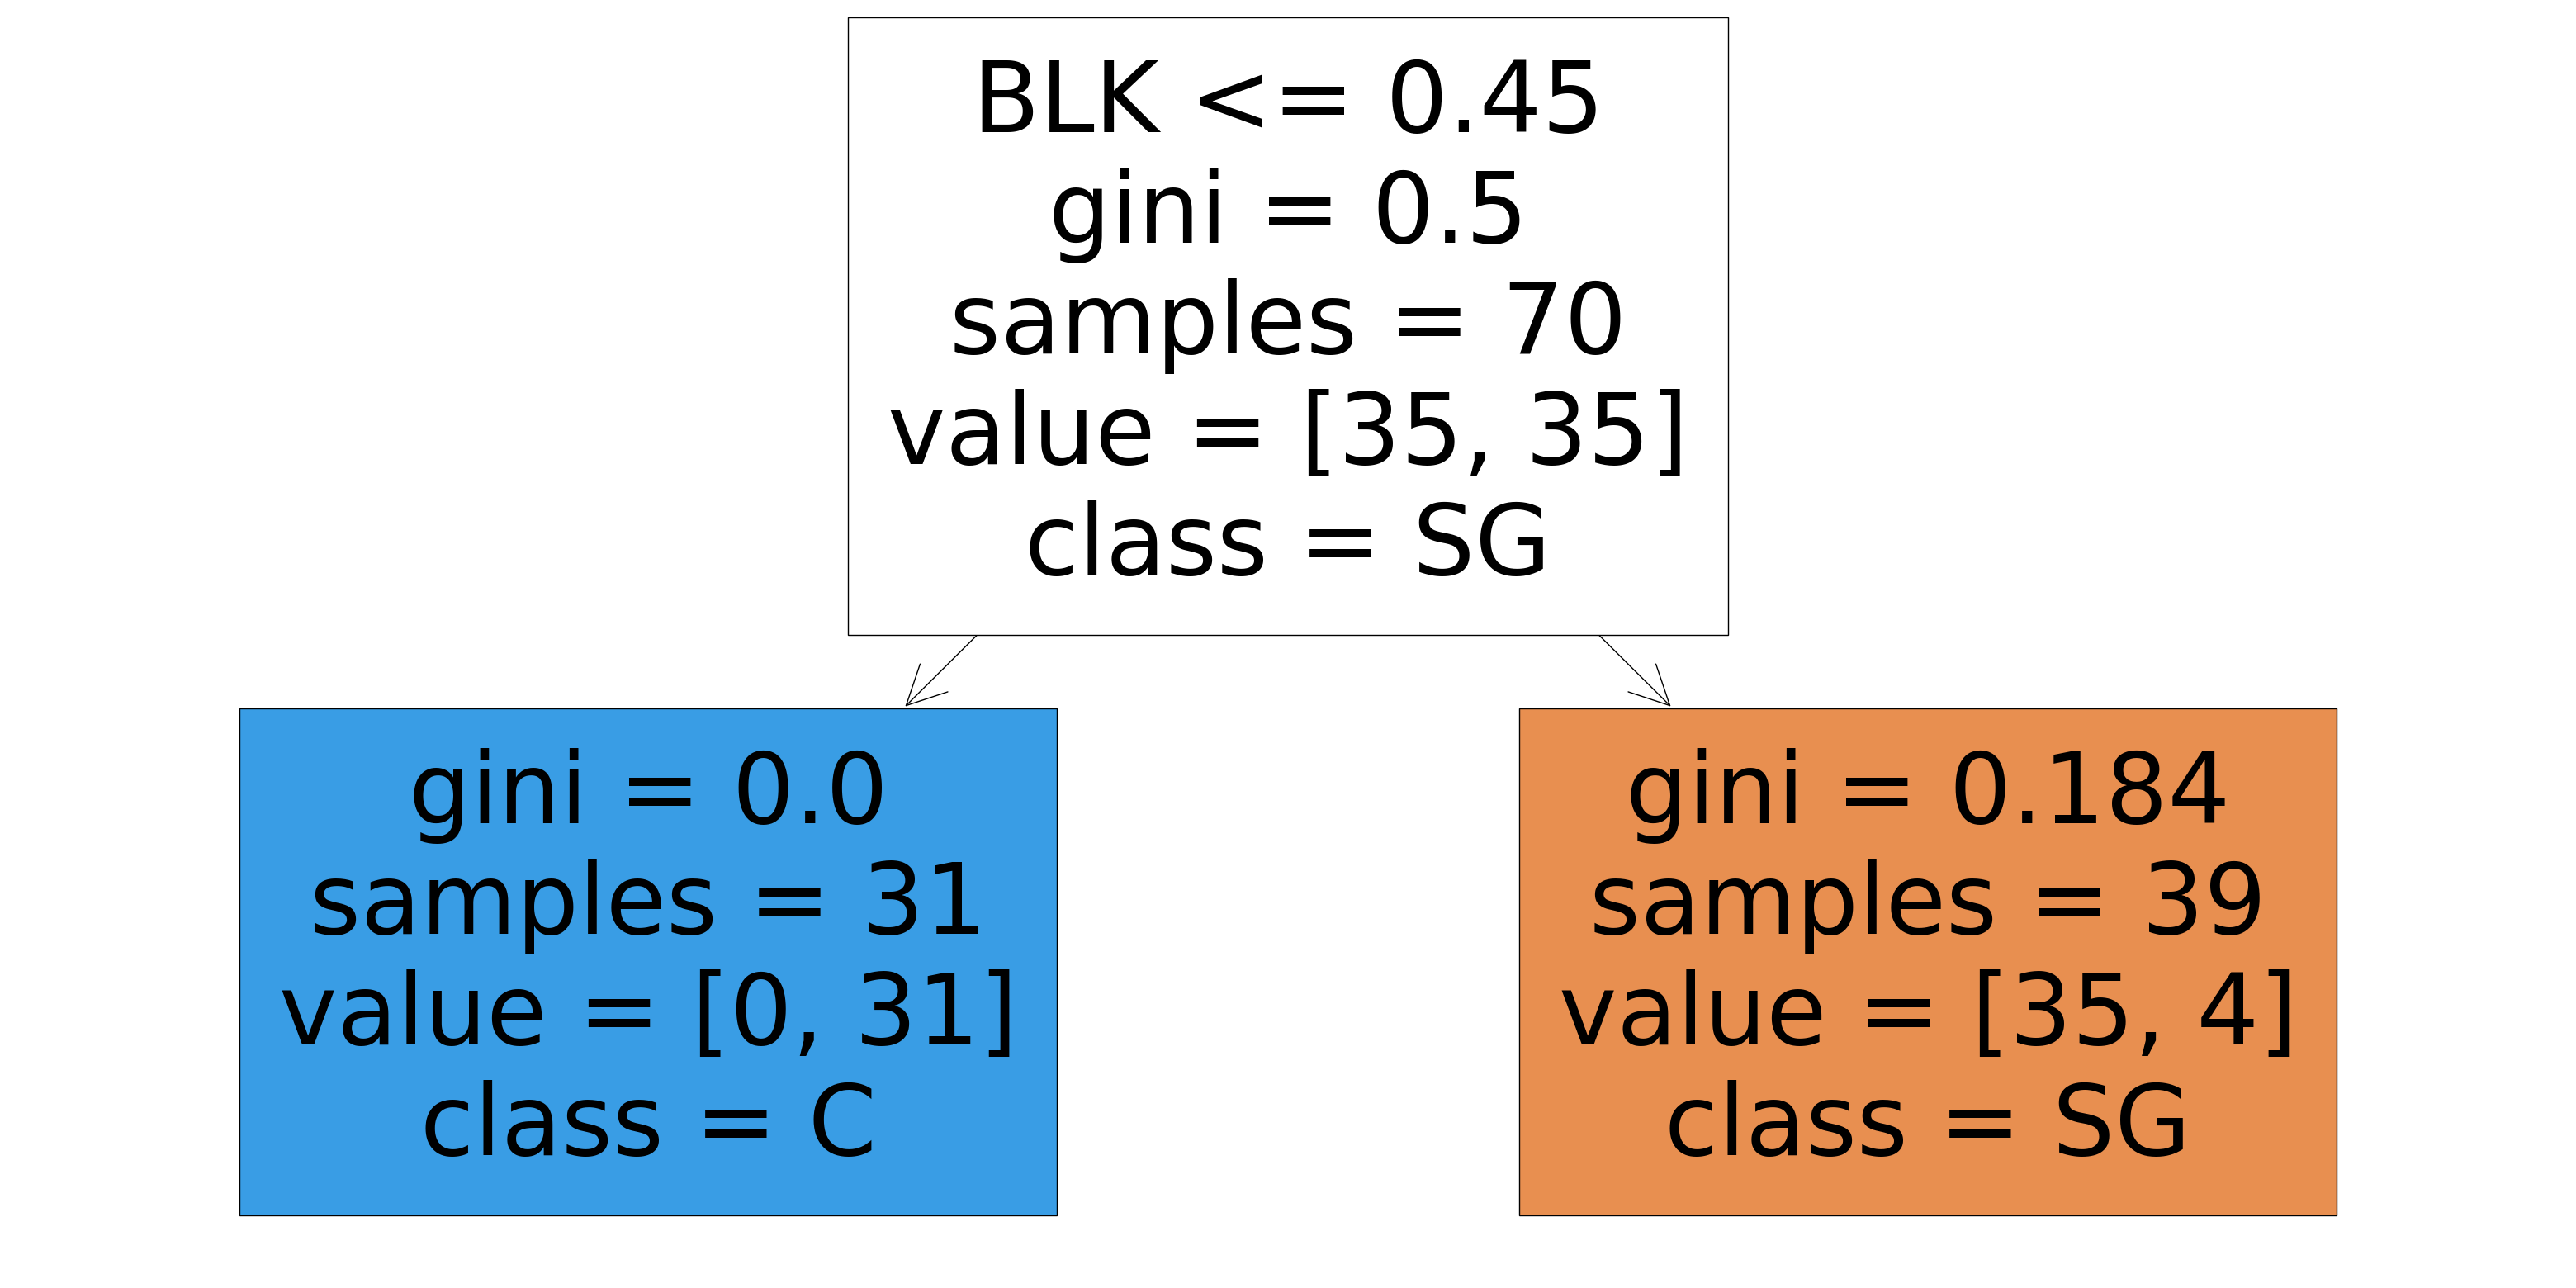

In [61]:
# 트리 시각화
from sklearn.tree import plot_tree

class_names = [str(cls) for cls in pd.unique(y)]

plt.figure(figsize=(40, 20))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=class_names)
plt.show()

## 4. rf

In [62]:
# rf 모델 생성, 학습, train score/test score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
print(f"rf train = {rf.score(X_train, y_train)}")
print(f"rf test = {rf.score(X_test, y_test)}")

rf train = 1.0
rf test = 0.9666666666666667


In [ ]:
# 그리드 서치(StratifiedKFold 사용)후 최적의 하이퍼파라미터 출력

params = {
    "n_estimators": [100, 150, 250],
    "max_depth": [3, 4, 5, 6],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10]
}

gs = GridSearchCV(RandomForestClassifier(), params, cv = StratifiedKFold())

gs.fit(X_train, y_train)
print(f"best params = {gs.best_params_}")

In [ ]:
# 최고의 교차검증 점수 출력
gs.best_score_

In [ ]:
# 최적의 모델로 정확도 다시 계산
rf = gs.best_estimator_

print(f"rf train = {rf.score(X_train, y_train)}")
print(f"rf test = {rf.score(X_test, y_test)}")

## 5. gb

In [ ]:
# gb 모델 생성, 학습, train score/test score
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

In [ ]:
print(f"gb train = {gb.score(X_train, y_train)}")
print(f"gb test = {gb.score(X_test, y_test)}")

In [ ]:
# 그리드 서치(StratifiedKFold 사용)후 최적의 하이퍼파라미터 출력

params = {
    "n_estimators": [100, 150, 250],
    "max_depth": [3, 4, 5, 6],
    "min_samples_leaf": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 4, 6, 8, 10]
}

gs = GridSearchCV(RandomForestClassifier(), params, cv = StratifiedKFold())

gs.fit(X_train, y_train)
print(f"best params = {gs.best_params_}")

In [ ]:
# 최고의 교차검증 점수 출력
gs.best_score_

In [ ]:
# 최적의 모델로 정확도 다시 계산
gb = gs.best_estimator_

print(f"gb train = {gb.score(X_train, y_train)}")
print(f"gb test = {gb.score(X_test, y_test)}")

# ETC

In [ ]:
# 성능 평가 지표
from sklearn.metrics import classification_report

y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
# 혼동 행렬 출력
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# 혼동 행렬 시각화
from sklearn import metrics

metrics.ConfusionMatrixDisplay(cm).plot()

In [ ]:
# 특성 중요도 출력
ftr_imp = rf.feature_importances_
print(ftr_imp)

In [ ]:
# 특성 중요도 시각화
ftr = pd.Series(ftr_imp, index = X_train.columns)
ftr = ftr.sort_values(ascending=False)

sns.barplot(x = ftr, y = ftr.index)